In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve,accuracy_score,plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("exp8f.csv")
data_otheta = pd.read_csv("exp8o.csv")

In [2]:
def reshape_normalize(arr):
    arr = np.array(arr,dtype=float)
    return np.log10(arr)
    # return (arr - np.min(arr))/(np.max(arr)-np.min(arr))

data['combined_left'] = np.sum(data.iloc[:,3:6],axis=1)    
data['combined_right'] = np.sum(data.iloc[:,6:10],axis=1)  
data = data[['Sr.', 'Sex', 'age', 'FP1-A1_d', 'F7-A1_d', 'F3-A1_d', 'FP2-A2_d',
       'F8-A2_d', 'F4-A2_d', 'combined_left', 'combined_right','Rating']]
data.iloc[:,3:11] = data.iloc[:,3:11].apply(reshape_normalize)
data_otheta.iloc[:,3:5] = data_otheta.iloc[:,3:5].apply(reshape_normalize)

In [3]:
data.columns

Index(['Sr.', 'Sex', 'age', 'FP1-A1_d', 'F7-A1_d', 'F3-A1_d', 'FP2-A2_d',
       'F8-A2_d', 'F4-A2_d', 'combined_left', 'combined_right', 'Rating'],
      dtype='object')

In [4]:
data_otheta.columns

Index(['Sr.', 'Sex', 'Age ', 'during_right', 'during_left', 'Rating'], dtype='object')

In [5]:
tfol = np.log10(np.sum(data.iloc[:,3:6],axis=1))
tfor = np.log10(np.sum(data.iloc[:,6:10],axis=1))

Text(0.5, 0, 'FP2')

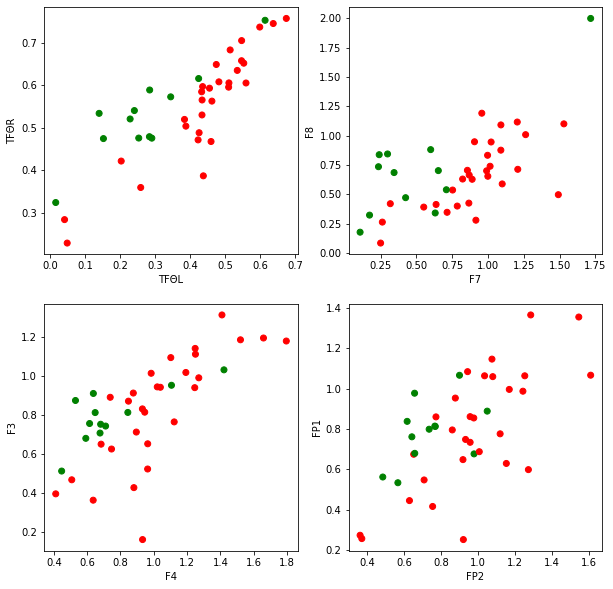

In [6]:
plt.figure(figsize=(10,10))
colors = {'A':'r', 'N':'g'}
plt.subplot(2,2,1)
plt.scatter(tfol,tfor, c = data["Rating"].map(colors))
plt.ylabel("TFΘR")
plt.xlabel("TFΘL")
plt.subplot(2,2,2)
plt.scatter(data["F7-A1_d"],data["F8-A2_d"], c = data["Rating"].map(colors))
plt.ylabel("F8")
plt.xlabel("F7")
plt.subplot(2,2,3)
plt.scatter(data["F3-A1_d"],data["F4-A2_d"], c = data["Rating"].map(colors))
plt.ylabel("F3")
plt.xlabel("F4")
plt.subplot(2,2,4)
plt.scatter(data["FP1-A1_d"],data["FP2-A2_d"], c = data["Rating"].map(colors))
plt.ylabel("FP1")
plt.xlabel("FP2")


In [10]:
x_train,x_test,y_train,y_test = train_test_split(pd.DataFrame([tfor,tfol]).T,data["Rating"],test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=2)
model = knn.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_test_con = np.where(y_test=="A",1,0)
y_pred_con = np.where(y_pred=="A",1,0) 
precision,recall,th = precision_recall_curve(y_test_con,y_pred_con)
print(f"Precision: {precision[0]}")
print(f"Recall: {recall[0]}")
print(f"Accuracy: {accuracy_score(y_test_con,y_pred_con)*100:.3f}%")

Precision: 0.8333333333333334
Recall: 1.0
Accuracy: 84.615%


In [11]:
x_train,x_test,y_train,y_test = train_test_split(data[["F3-A1_d","F4-A2_d"]],data["Rating"],test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=2)
model = knn.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_test_con = np.where(y_test=="A",1,0)
y_pred_con = np.where(y_pred=="A",1,0) 
precision,recall,th = precision_recall_curve(y_test_con,y_pred_con)
print(f"Precision: {precision[0]}")
print(f"Recall: {recall[0]}")
print(f"Accuracy: {accuracy_score(y_test_con,y_pred_con)*100:.3f}%")

Precision: 1.0
Recall: 1.0
Accuracy: 100.000%


In [12]:
x_train,x_test,y_train,y_test = train_test_split(data[["F7-A1_d","F8-A2_d"]],data["Rating"],test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=2)
model = knn.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_test_con = np.where(y_test=="A",1,0)
y_pred_con = np.where(y_pred=="A",1,0) 
precision,recall,th = precision_recall_curve(y_test_con,y_pred_con)
print(f"Precision: {precision[0]}")
print(f"Recall: {recall[0]}")
print(f"Accuracy: {accuracy_score(y_test_con,y_pred_con)*100:.3f}%")

Precision: 1.0
Recall: 1.0
Accuracy: 100.000%


In [13]:
x_train,x_test,y_train,y_test = train_test_split(data[["FP1-A1_d","FP2-A2_d"]],data["Rating"],test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=2)
model = knn.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_test_con = np.where(y_test=="A",1,0)
y_pred_con = np.where(y_pred=="A",1,0) 
precision,recall,th = precision_recall_curve(y_test_con,y_pred_con)
print(f"Precision: {precision[0]}")
print(f"Recall: {recall[0]}")
print(f"Accuracy: {accuracy_score(y_test_con,y_pred_con)*100:.3f}%")

Precision: 0.8461538461538461
Recall: 1.0
Accuracy: 84.615%


Text(0.5, 0, 'O1')

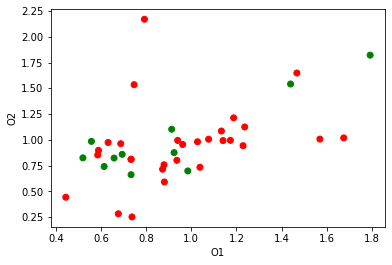

In [14]:
colors = {'A':'r', 'N':'g'}
plt.scatter(data_otheta['during_left'],data_otheta['during_right'],c = data_otheta["Rating"].map(colors))
plt.ylabel("O2")
plt.xlabel("O1")

In [15]:
x_train,x_test,y_train,y_test = train_test_split(data_otheta[["during_left","during_right"]],data_otheta["Rating"],test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=2)
model = knn.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_test_con = np.where(y_test=="A",1,0)
y_pred_con = np.where(y_pred=="A",1,0) 
precision,recall,th = precision_recall_curve(y_test_con,y_pred_con)
print(f"Precision: {precision[0]}")
print(f"Recall: {recall[0]}")
print(f"Accuracy: {accuracy_score(y_test_con,y_pred_con)*100:.3f}%")

Precision: 0.8333333333333334
Recall: 1.0
Accuracy: 83.333%
